In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.api import acf, graphics, pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order


In [3]:

data_df = pd.read_csv('/Users/sebastianlorenzen-schmidt/neuefische/capstone_project/data/owid-energy-data.csv')
data_df


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17466,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17467,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17468,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [4]:
years = range(2000,2020)
world_df = data_df[data_df['country']== 'World']
world_df_slice = world_df[world_df['year'].isin(years)]
world_df_slice

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
17042,OWID_WRL,World,2000,1.478,390.274,3.941,910.310,4.552,1822.809,2.507,...,0.174,0.507,5.730000e+13,0.213,48.099,0.080,28.347,87.280,5.125,14.207
17043,OWID_WRL,World,2001,4.239,1135.920,2.400,576.273,-0.021,-8.945,1.002,...,0.215,0.621,5.860000e+13,0.255,21.389,0.096,18.669,105.949,6.174,17.026
17044,OWID_WRL,World,2002,1.210,337.983,2.297,564.819,-1.219,-510.394,2.191,...,0.272,0.767,6.050000e+13,0.339,35.433,0.127,37.541,143.490,8.367,22.770
17045,OWID_WRL,World,2003,7.337,2074.432,3.588,902.400,4.432,1832.254,3.575,...,0.329,0.964,6.240000e+13,0.402,19.456,0.146,27.918,171.409,10.134,26.862
17046,OWID_WRL,World,2004,8.663,2629.000,3.269,851.728,4.996,2157.278,4.859,...,0.429,1.246,6.600000e+13,0.503,34.423,0.188,59.004,230.413,13.119,35.661
17047,OWID_WRL,World,2005,6.282,2071.771,2.373,638.467,0.852,386.437,3.357,...,0.588,1.713,7.070000e+13,0.598,21.511,0.221,49.565,279.978,16.007,42.798
17048,OWID_WRL,World,2006,5.106,1789.627,3.405,937.859,0.903,412.926,2.859,...,0.781,2.309,7.510000e+13,0.726,26.841,0.272,75.149,355.127,20.012,53.616
17049,OWID_WRL,World,2007,4.386,1615.588,2.564,730.193,-0.237,-109.417,3.090,...,1.045,3.078,7.990000e+13,0.895,27.702,0.337,98.376,453.503,25.559,67.627
17050,OWID_WRL,World,2008,3.263,1254.826,3.702,1081.440,1.045,481.000,1.147,...,1.684,4.916,8.300000e+13,1.129,28.436,0.428,128.958,582.461,32.329,85.794
17051,OWID_WRL,World,2009,-0.041,-16.263,-3.117,-944.242,-2.509,-1166.638,-1.512,...,2.826,8.005,8.240000e+13,1.433,24.337,0.540,141.751,724.212,40.406,105.374


In [5]:
world_df_slice.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,...,20.000000,20.000000,1.700000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,2009.50000,2.931050,1006.954000,2.787200,839.681600,1.340150,601.429000,2.116550,2764.56760,1.522950,...,19.200000,49.225250,8.166471e+13,2.061550,23.036500,0.803500,174.055850,1202.440500,64.672700,164.407950
std,5.91608,3.484153,1311.863507,1.944648,609.950917,1.968945,862.912022,1.481154,1858.92908,0.438957,...,27.690826,69.912081,1.712403e+13,1.716878,9.157762,0.684969,127.985351,1107.009706,57.848807,143.839755
min,2000.00000,-5.181000,-2326.870000,-3.117000,-944.242000,-2.509000,-1166.638000,-1.512000,-2058.96800,0.971000,...,0.174000,0.507000,5.730000e+13,0.213000,10.454000,0.080000,18.669000,87.280000,5.125000,14.207000
25%,2004.75000,1.194250,377.201250,2.150500,622.918500,0.151500,72.928000,1.252000,1775.79625,1.137500,...,0.548250,1.596250,6.600000e+13,0.574250,17.518500,0.212750,56.644250,267.586750,15.285000,41.013750
50%,2009.50000,2.889500,1103.643000,2.916500,799.515500,0.877500,399.681500,2.041000,2704.14300,1.454000,...,3.607000,10.320500,8.240000e+13,1.550000,21.450000,0.591500,155.958500,813.839500,45.109500,117.621000
75%,2014.25000,5.217000,2072.436250,3.616500,1063.504500,2.507250,1248.323750,2.916750,4037.00275,1.935250,...,28.886250,73.777250,9.660000e+13,3.243500,27.056250,1.248500,271.394750,1874.343750,102.173500,256.099750
max,2019.00000,8.663000,3060.593000,7.199000,2112.975000,4.996000,2157.278000,4.859000,6446.80900,2.211000,...,91.371000,232.450000,1.070000e+14,5.471000,48.099000,2.183000,428.736000,3540.051000,183.897000,458.944000


In [6]:
world_df_slice.isnull().nunique()

iso_code                  1
country                   1
year                      1
coal_prod_change_pct      1
coal_prod_change_twh      1
                         ..
wind_share_energy         1
wind_cons_change_twh      1
wind_consumption          1
wind_elec_per_capita      1
wind_energy_per_capita    1
Length: 124, dtype: int64

In [7]:
world_df_nrg_mix = world_df_slice[['year','biofuel_share_energy','coal_share_energy','gas_share_energy','nuclear_share_energy','hydro_share_energy','oil_share_energy','solar_share_energy','wind_share_energy','other_renewables_share_energy','fossil_share_energy','low_carbon_share_energy']]
world_df_nrg_mix.head()

,year,biofuel_share_energy,coal_share_energy,gas_share_energy,nuclear_share_energy,hydro_share_energy,oil_share_energy,solar_share_energy,wind_share_energy,other_renewables_share_energy,fossil_share_energy,low_carbon_share_energy
17042,2000,0.115,25.020,21.901,6.542,6.722,39.146,0.003,0.080,0.472,86.066,13.934
17043,2001,0.114,25.165,21.983,6.617,6.443,39.102,0.003,0.096,0.478,86.249,13.751
17044,2002,0.129,25.591,22.150,6.536,6.380,38.583,0.004,0.127,0.500,86.323,13.677
17045,2003,0.141,26.886,21.982,6.143,6.111,38.079,0.005,0.146,0.507,86.947,13.053
17046,2004,0.162,27.405,21.764,6.086,6.216,37.655,0.007,0.188,0.518,86.824,13.176


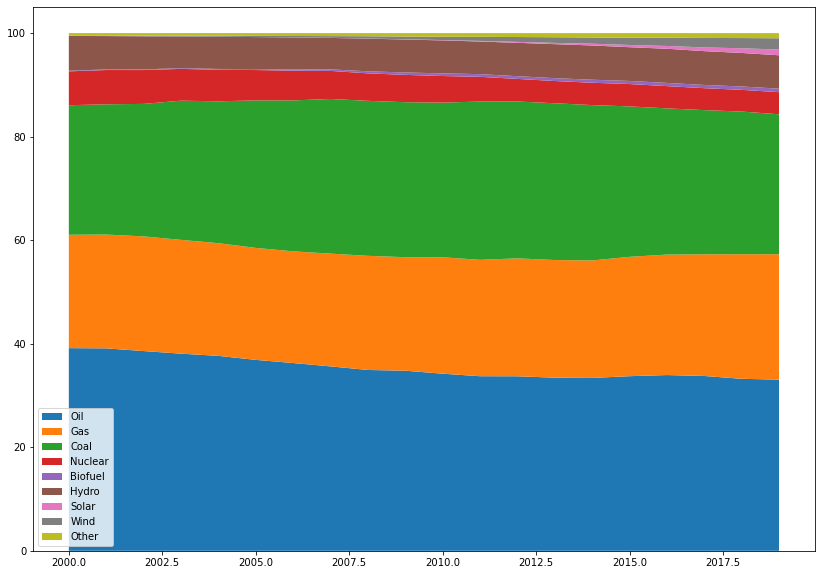

In [36]:
#create graphical representation for energy mix:
plt.figure(figsize=(14,10))
plt.stackplot(world_df_nrg_mix['year'],
                world_df_nrg_mix['oil_share_energy'],
                world_df_nrg_mix['gas_share_energy'],
                world_df_nrg_mix['coal_share_energy'],
                world_df_nrg_mix['nuclear_share_energy'],
                world_df_nrg_mix['biofuel_share_energy'],
                world_df_nrg_mix['hydro_share_energy'],
                world_df_nrg_mix['solar_share_energy'],
                world_df_nrg_mix['wind_share_energy'],
                world_df_nrg_mix['other_renewables_share_energy'],
                labels=['Oil','Gas','Coal','Nuclear','Biofuel','Hydro','Solar','Wind','Other'])
plt.legend(loc='lower left')


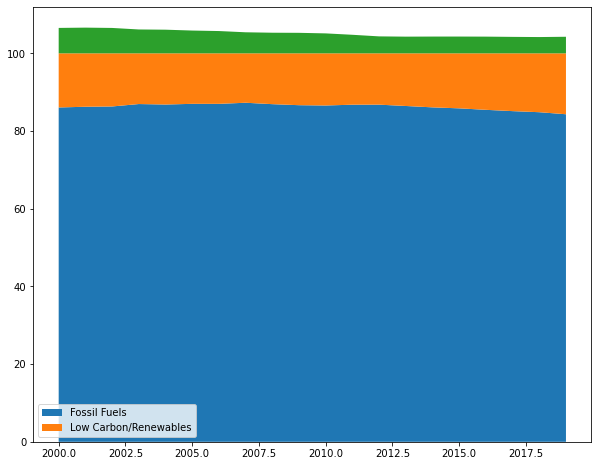

In [37]:
plt.figure(figsize=(10,8))
plt.stackplot(world_df_nrg_mix['year'],
                world_df_nrg_mix['fossil_share_energy'],
                world_df_nrg_mix['low_carbon_share_energy'],
                world_df_nrg_mix['nuclear_share_energy'],
                labels=['Fossil Fuels','Low Carbon/Renewables'])
plt.legend(loc='lower left')

In [10]:
#data for the relevant years:

data_y_slice = data_df[data_df['year'].isin(years)]
data_y_slice


,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
100,AFG,Afghanistan,2000,0.000,0.000,NaN,NaN,NaN,NaN,-12.633,...,0.000,NaN,1.650883e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
101,AFG,Afghanistan,2001,2498.993,0.145,NaN,NaN,NaN,NaN,-22.419,...,0.000,NaN,1.557484e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
102,AFG,Afghanistan,2002,-19.231,-0.029,NaN,NaN,NaN,NaN,-4.909,...,0.000,NaN,2.567680e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
103,AFG,Afghanistan,2003,66.667,0.081,NaN,NaN,NaN,NaN,18.293,...,0.000,NaN,2.780556e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
104,AFG,Afghanistan,2004,-2.857,-0.006,NaN,NaN,NaN,NaN,-7.385,...,0.000,NaN,2.844769e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17466,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17467,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17468,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [11]:
continents = ['Africa','Asia Pacific','Europe','North America','South & Central America','Australia']
data_continents_df = data_y_slice[data_y_slice['country'].isin(continents)] 
data_continents_df

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
220,NaN,Africa,2000,-0.087,-1.320,11.037,134.287,7.284,292.915,2.362,...,0.016,0.045,NaN,0.040,788.889,0.015,0.434,0.489,0.217,0.603
221,NaN,Africa,2001,-0.248,-3.761,3.363,45.431,-1.002,-43.243,3.912,...,0.020,0.054,NaN,0.091,134.874,0.035,0.659,1.148,0.501,1.382
222,NaN,Africa,2002,-1.673,-25.333,4.557,63.640,0.679,28.986,1.111,...,0.023,0.063,NaN,0.092,6.161,0.036,0.071,1.219,0.522,1.432
223,NaN,Africa,2003,7.458,111.037,7.425,108.417,8.758,376.609,4.746,...,0.026,0.072,NaN,0.107,20.951,0.042,0.255,1.474,0.620,1.690
224,NaN,Africa,2004,2.181,34.898,4.627,72.579,11.272,527.174,7.156,...,0.031,0.083,NaN,0.144,41.238,0.055,0.608,2.082,0.861,2.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14219,NaN,South & Central America,2015,-5.048,-39.909,1.131,19.903,1.339,61.129,0.137,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14220,NaN,South & Central America,2016,3.964,29.755,-0.097,-1.725,-4.831,-223.487,-1.044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14221,NaN,South & Central America,2017,-1.784,-13.925,2.007,35.696,-3.103,-136.620,0.400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14222,NaN,South & Central America,2018,-6.646,-50.944,-2.909,-52.789,-9.251,-394.586,-0.298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_africa = data_continents_df[data_continents_df['country'] == 'Africa'] 
data_africa.to_csv(path_or_buf= 'data/data_africa.csv')
data_asia_pacific = data_continents_df[data_continents_df['country'] == 'Asia Pacific'] 
data_asia_pacific.to_csv(path_or_buf= 'data/data_asia_pacific.csv')
data_NA = data_continents_df[data_continents_df['country'] == 'North America']
data_NA.to_csv(path_or_buf= 'data/data_NA.csv') 
data_SCA = data_continents_df[data_continents_df['country'] == 'South & Cental America'] 
data_SCA.to_csv(path_or_buf= 'data/data_SCA.csv')
data_eur = data_continents_df[data_continents_df['country'] == 'Europe'] 
data_eur.to_csv(path_or_buf='data/data_europe.csv')
data_aus = data_continents_df[data_continents_df['country'] == 'Australia'] 
data_aus.to_csv(path_or_buf= 'data/data_australia.csv')


In [13]:
data_eur

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
5392,NaN,Europe,2000,-3.644,-122.105,2.438,73.753,0.572,22.162,1.173,...,0.185,0.515,NaN,0.620,57.640,0.257,22.807,62.374,30.908,85.967
5393,NaN,Europe,2001,-0.758,-24.457,1.281,39.688,-2.784,-108.433,1.169,...,0.234,0.647,NaN,0.731,19.170,0.302,11.957,74.332,37.062,102.417
5394,NaN,Europe,2002,-0.871,-27.917,2.818,88.440,-0.624,-23.629,-0.430,...,0.381,1.045,NaN,0.980,34.368,0.408,25.546,99.878,50.084,137.513
5395,NaN,Europe,2003,-0.763,-24.225,1.057,34.126,-4.293,-161.528,1.798,...,0.644,1.756,NaN,1.168,21.468,0.487,21.441,121.319,61.158,166.845
5396,NaN,Europe,2004,-3.112,-98.093,3.452,112.593,-4.327,-155.797,1.454,...,1.030,2.792,NaN,1.521,32.310,0.635,39.198,160.517,81.322,220.445
5397,NaN,Europe,2005,-2.168,-66.217,-2.913,-98.293,-7.981,-274.933,0.472,...,2.035,5.482,NaN,1.795,19.141,0.753,30.725,191.241,97.350,262.230
5398,NaN,Europe,2006,-0.360,-10.766,-2.201,-72.087,-7.543,-239.126,0.864,...,3.450,9.235,NaN,2.071,16.238,0.868,31.053,222.294,113.675,304.285
5399,NaN,Europe,2007,-1.899,-56.511,-4.402,-141.023,-4.878,-142.958,-0.932,...,5.206,13.847,NaN,2.601,26.319,1.106,58.507,280.801,144.219,383.640
5400,NaN,Europe,2008,-2.298,-67.097,4.636,141.990,-4.786,-133.429,-0.492,...,10.212,26.998,NaN,2.968,14.082,1.268,39.544,320.344,165.220,436.784
5401,NaN,Europe,2009,-5.435,-155.075,-5.231,-167.628,-5.561,-147.627,-5.904,...,19.283,50.664,NaN,3.476,10.872,1.495,34.828,355.172,183.939,483.278


Text(0.5, 1.0, 'Energy Mix Europe')

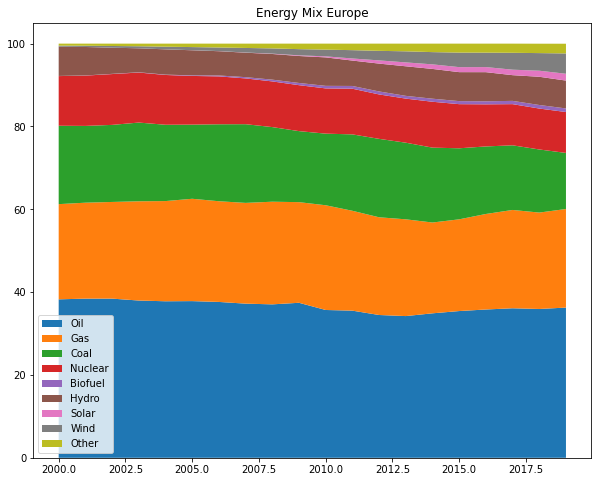

In [14]:
plt.figure(figsize=(10,8))
plt.stackplot( data_eur['year'],
                data_eur['oil_share_energy'], 
                data_eur['gas_share_energy'], 
                data_eur['coal_share_energy'],
                data_eur['nuclear_share_energy'],
                data_eur['biofuel_share_energy'],
                data_eur['hydro_share_energy'],
                data_eur['solar_share_energy'],
                data_eur['wind_share_energy'],
                data_eur['other_renewables_share_energy'],
                labels=['Oil','Gas','Coal','Nuclear','Biofuel','Hydro','Solar','Wind','Other'])
plt.legend(loc='lower left')
plt.title('Energy Mix Europe')

## further cleanup



In [15]:
regions = ['Africa','Asia Pacific','Europe','North America','South & Central America','World']

#coal data
df_coal = data_df[[ 'country',
                    'year',
                    'coal_prod_change_pct',
                    'coal_prod_change_twh',
                    'coal_share_elec',
                    'coal_cons_change_pct',
                    'coal_share_energy',
                    'coal_cons_change_twh',
                    'coal_consumption',
                    'coal_elec_per_capita',
                    'coal_production',
                    'coal_prod_per_capita',
                    'coal_electricity']]

df_coal2 = df_coal[df_coal['year'].isin(years)]
#df_coal2.to_csv(path_or_buf= 'data/data_coal.csv')
df_coal2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4784 entries, 100 to 17469
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               4784 non-null   object 
 1   year                  4784 non-null   int64  
 2   coal_prod_change_pct  1680 non-null   float64
 3   coal_prod_change_twh  2681 non-null   float64
 4   coal_share_elec       4284 non-null   float64
 5   coal_cons_change_pct  1544 non-null   float64
 6   coal_share_energy     1660 non-null   float64
 7   coal_cons_change_twh  1660 non-null   float64
 8   coal_consumption      1980 non-null   float64
 9   coal_elec_per_capita  4218 non-null   float64
 10  coal_production       2685 non-null   float64
 11  coal_prod_per_capita  2451 non-null   float64
 12  coal_electricity      4320 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 523.2+ KB


In [16]:
#oil data
df_oil = data_df[[ 'country',
                    'year',
                    'oil_prod_change_pct',
                    'oil_prod_change_twh',
                    'oil_share_elec',
                    'oil_cons_change_pct',
                    'oil_share_energy',
                    'oil_cons_change_twh',
                    'oil_consumption',
                    'oil_elec_per_capita',
                    'oil_production',
                    'oil_prod_per_capita',
                    'oil_electricity']]

df_oil2 = df_oil[df_coal['year'].isin(years)]
#df_oil2.to_csv(path_or_buf= 'data/data_oil.csv')
df_oil2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4784 entries, 100 to 17469
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              4784 non-null   object 
 1   year                 4784 non-null   int64  
 2   oil_prod_change_pct  1786 non-null   float64
 3   oil_prod_change_twh  1720 non-null   float64
 4   oil_share_elec       4284 non-null   float64
 5   oil_cons_change_pct  1660 non-null   float64
 6   oil_share_energy     1660 non-null   float64
 7   oil_cons_change_twh  1660 non-null   float64
 8   oil_consumption      1980 non-null   float64
 9   oil_elec_per_capita  4218 non-null   float64
 10  oil_production       1725 non-null   float64
 11  oil_prod_per_capita  1539 non-null   float64
 12  oil_electricity      4320 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 523.2+ KB


In [17]:
#gas data
df_gas = data_df[[ 'country',
                    'year',
                    'gas_prod_change_pct',
                    'gas_prod_change_twh',
                    'gas_share_elec',
                    'gas_cons_change_pct',
                    'gas_share_energy',
                    'gas_cons_change_twh',
                    'gas_consumption',
                    'gas_elec_per_capita',
                    'gas_production',
                    'gas_prod_per_capita',
                    'gas_electricity']]

df_gas2 = df_gas[df_gas['year'].isin(years)]
#df_gas2.to_csv(path_or_buf= 'data/data_gas.csv')

In [18]:
#biofuels data
df_biofuel = data_df[[ 'country',
                    'year',
                    #'biofuel_prod_change_pct',
                    #'biofuel_prod_change_twh',
                    'biofuel_share_elec',
                    'biofuel_cons_change_pct',
                    'biofuel_share_energy',
                    'biofuel_cons_change_twh',
                    'biofuel_consumption',
                    'biofuel_elec_per_capita',
                    #'biofuel_production',
                    #'biofuel_prod_per_capita',
                    'biofuel_electricity',
                    'biofuel_cons_per_capita']]

df_biofuel2 = df_biofuel[df_biofuel['year'].isin(years)]
##df_biofuel2.to_csv(path_or_buf= 'data/data_biofuel.csv')

In [19]:
#fossils data
df_fossil = data_df[[ 'country',
                    'year',
                    #'fossil_prod_change_pct',
                    #'fossil_prod_change_twh',
                    'fossil_share_elec',
                    'fossil_cons_change_pct',
                    'fossil_share_energy',
                    'fossil_cons_change_twh',
                    'fossil_fuel_consumption',
                    'fossil_energy_per_capita',
                    #'fossil_production',
                    #'fossil_prod_per_capita',
                    'fossil_electricity',
                    'fossil_cons_per_capita']]

df_fossil2 = df_fossil[df_fossil['year'].isin(years)]
##df_fossil2.to_csv(path_or_buf= 'data/data_fossils.csv')

In [20]:
#Nuclear data
df_nuclear = data_df[[ 'country',
                    'year',
                    #'nuclear_prod_change_pct',
                    #'nuclear_prod_change_twh',
                    'nuclear_share_elec',
                    'nuclear_cons_change_pct',
                    'nuclear_share_energy',
                    'nuclear_cons_change_twh',
                    'nuclear_consumption',
                    'nuclear_energy_per_capita',
                    'nuclear_elec_per_capita',
                    #'nuclear_production',
                    #'nuclear_prod_per_capita',
                    'nuclear_electricity',
                    #'nuclear_cons_per_capita'
                    ]]

df_nuclear2 = df_nuclear[df_nuclear['year'].isin(years)]
df_nuclear2.to_csv(path_or_buf= 'data/data_nuclear.csv')

In [21]:
#Hydropower data
df_hydro = data_df[[ 'country',
                    'year',
                    #'hydro_prod_change_pct',
                    #'hydro_prod_change_twh',
                    'hydro_share_elec',
                    'hydro_cons_change_pct',
                    'hydro_share_energy',
                    'hydro_cons_change_twh',
                    'hydro_consumption',
                    'hydro_energy_per_capita',
                    'hydro_elec_per_capita',
                    #'hydro_production',
                    #'hydro_prod_per_capita',
                    'hydro_electricity',
                    #'hydro_cons_per_capita'
                    ]]

df_hydro2 = df_hydro[df_hydro['year'].isin(years)]
##df_hydro2.to_csv(path_or_buf= 'data/data_hydro.csv')

In [22]:
#low_carbon data
df_lowcarb = data_df[[ 'country',
                    'year',
                    #'low_carbon_prod_change_pct',
                    #'low_carbon_prod_change_twh',
                    'low_carbon_share_elec',
                    'low_carbon_cons_change_pct',
                    'low_carbon_share_energy',
                    'low_carbon_cons_change_twh',
                    'low_carbon_consumption',
                    'low_carbon_energy_per_capita',
                    'low_carbon_elec_per_capita',
                    #'low_carbon_production',
                    #'low_carbon_prod_per_capita',
                    'low_carbon_electricity',
                    #'low_carbon_cons_per_capita'
                    ]]

df_lowcarb2 = df_lowcarb[df_lowcarb['year'].isin(years)]
#df_lowcarb2.to_csv(path_or_buf= 'data/data_low_carbon.csv')

In [23]:
#other renewables data
df_other_renew = data_df[[ 'country',
                    'year',
                    #'other_renewables_prod_change_pct',
                    #'other_renewables_prod_change_twh',
                    'other_renewables_share_elec',
                    'other_renewables_share_elec_exc_biofuel',
                    'other_renewables_cons_change_pct',
                    'other_renewables_share_energy',
                    'other_renewables_cons_change_twh',
                    'other_renewable_consumption',
                    'other_renewables_energy_per_capita',
                    'other_renewables_elec_per_capita',
                    'other_renewables_elec_per_capita_exc_biofuel',
                    #'other_renewables_production',
                    #'other_renewables_prod_per_capita',
                    'other_renewable_electricity',
                    'other_renewable_exc_biofuel_electricity',
                    #'other_renewables_cons_per_capita'
                    ]]

df_other_renew2 = df_other_renew[df_other_renew['year'].isin(years)]
#df_other_renew2.to_csv(path_or_buf= 'data/data_other_renewables.csv')

In [24]:
#solar data
df_solar = data_df[[ 'country',
                    'year',
                    #'solar_prod_change_pct',
                    #'solar_prod_change_twh',
                    'solar_share_elec',
                    'solar_cons_change_pct',
                    'solar_share_energy',
                    'solar_cons_change_twh',
                    'solar_consumption',
                    'solar_energy_per_capita',
                    'solar_elec_per_capita',
                    #'solar_production',
                    #'solar_prod_per_capita',
                    'solar_electricity',
                    #'solar_cons_per_capita'
                    ]]

df_solar2 = df_solar[df_solar['year'].isin(years)]
#df_solar2.to_csv(path_or_buf= 'data/data_solar.csv')

In [25]:
#wind data
df_wind = data_df[[ 'country',
                    'year',
                    #'wind_prod_change_pct',
                    #'wind_prod_change_twh',
                    'wind_share_elec',
                    'wind_cons_change_pct',
                    'wind_share_energy',
                    'wind_cons_change_twh',
                    'wind_consumption',
                    'wind_energy_per_capita',
                    'wind_elec_per_capita',
                    #'wind_production',
                    #'wind_prod_per_capita',
                    'wind_electricity',
                    #'wind_cons_per_capita'
                    ]]

df_wind2 = df_wind[df_wind['year'].isin(years)]
#df_wind2.to_csv(path_or_buf= 'data/data_wind.csv')

In [26]:
#renewables data
df_renew = data_df[[ 'country',
                    'year',
                    #'renewables_prod_change_pct',
                    #'renewables_prod_change_twh',
                    'renewables_share_elec',
                    'renewables_cons_change_pct',
                    'renewables_share_energy',
                    'renewables_cons_change_twh',
                    'renewables_consumption',
                    'renewables_energy_per_capita',
                    'renewables_elec_per_capita',
                    #'renewables_production',
                    #'renewables_prod_per_capita',
                    'renewables_electricity',
                    #'renewables_cons_per_capita'
                    ]]

df_renew2 = df_renew[df_renew['year'].isin(years)]
#df_renew2.to_csv(path_or_buf= 'data/data_renewables.csv')

In [27]:
#general data
df_general = data_df[[ 'country',
                    'year',
                    'gdp',
                    'energy_per_gdp',
                    'population',
                    'energy_per_capita',
                    'carbon_intensity_elec',
                    'primary_energy_consumption',
                    'electricity_generation',
                    'per_capita_electricity',
                    'biofuel_electricity',
                    'coal_electricity',
                    'fossil_electricity',
                    'gas_electricity',
                    'hydro_electricity',
                    'nuclear_electricity',
                    'oil_electricity',
                    'other_renewable_electricity',
                    'other_renewable_exc_biofuel_electricity',
                    'renewables_electricity',
                    'solar_electricity',
                    'wind_electricity',
                    ]]

df_general2 = df_general[df_general['year'].isin(years)]
##df_general2.to_csv(path_or_buf= 'data/data_general.csv')

In [28]:
data_ger = df_general2[df_general2['country']== 'Germany']
data_ger

,country,year,gdp,energy_per_gdp,population,energy_per_capita,carbon_intensity_elec,primary_energy_consumption,electricity_generation,per_capita_electricity,...,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity
6128,Germany,2000,2.790000e+12,1.424,81400883.0,48823.532,559.0,3974.284,572.30,7030.636,...,367.22,52.49,21.73,169.61,18.05,4.33,0.00,35.47,0.06,9.35
6129,Germany,2001,2.840000e+12,1.424,81453894.0,49653.537,574.0,4044.479,581.89,7143.796,...,372.69,58.43,22.73,171.30,20.52,4.59,0.00,37.90,0.12,10.46
6130,Germany,2002,2.860000e+12,1.395,81535124.0,48946.940,570.0,3990.889,581.96,7137.537,...,372.64,54.51,23.12,164.84,18.53,5.31,0.00,44.48,0.19,15.86
6131,Germany,2003,2.880000e+12,1.384,81614371.0,48852.431,554.0,3987.042,602.54,7382.768,...,390.81,64.43,18.32,165.06,21.75,8.95,0.00,46.67,0.31,19.09
6132,Germany,2004,2.960000e+12,1.346,81646474.0,48786.086,538.0,3983.189,610.28,7474.664,...,385.24,64.57,20.75,167.07,21.90,10.64,0.00,57.97,0.56,26.02
6133,Germany,2005,3.070000e+12,1.282,81602739.0,48221.023,520.0,3934.980,613.41,7517.027,...,386.96,74.37,19.64,163.05,24.45,14.71,0.00,63.40,1.28,27.77
6134,Germany,2006,3.190000e+12,1.264,81472235.0,49482.713,515.0,4031.456,629.81,7730.364,...,390.03,77.18,20.03,167.27,23.92,18.94,0.00,72.51,2.22,31.32
6135,Germany,2007,3.370000e+12,1.145,81277836.0,47470.932,534.0,3858.342,632.31,7779.612,...,402.40,80.02,21.17,140.53,25.28,24.62,0.00,89.38,3.08,40.51
6136,Germany,2008,3.390000e+12,1.149,81065751.0,48068.741,501.0,3896.741,633.20,7810.943,...,390.43,90.70,20.44,148.49,24.52,28.04,0.02,94.28,4.42,41.38
6137,Germany,2009,3.230000e+12,1.131,80899961.0,45166.556,496.0,3653.974,588.94,7279.855,...,358.07,82.55,19.03,134.93,22.07,30.91,0.02,95.94,6.58,39.42


Text(0.5, 1.0, 'Germany Mix Europe')

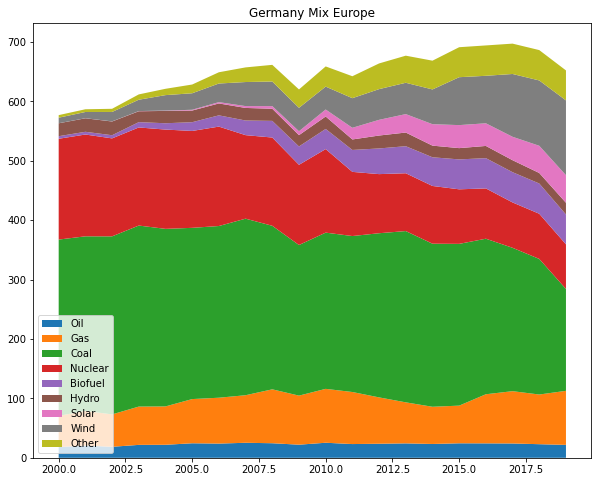

In [29]:
plt.figure(figsize=(10,8))
plt.stackplot( data_ger['year'],
                data_ger['oil_electricity'], 
                data_ger['gas_electricity'], 
                data_ger['coal_electricity'],
                data_ger['nuclear_electricity'],
                data_ger['biofuel_electricity'],
                data_ger['hydro_electricity'],
                data_ger['solar_electricity'],
                data_ger['wind_electricity'],
                data_ger['other_renewable_electricity'],
                labels=['Oil','Gas','Coal','Nuclear','Biofuel','Hydro','Solar','Wind','Other'])
plt.legend(loc='lower left')
plt.title('Germany Mix Europe')



## Regression Ideas

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

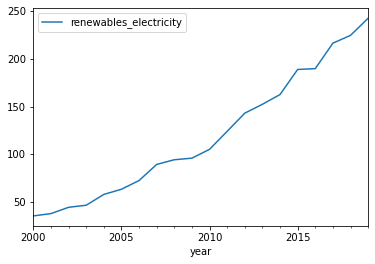

In [47]:
#Testregression for trend development of renewable energy in germany
data_ger.plot('year', 'renewables_electricity', kind = 'line')
X = data_ger['year']

X = sm.add_constant(X)

y = data_ger.renewables_electricity
ger_renew_model=sm.OLS(y,X).fit()
print(ger_renew_model.summary())



In [31]:
print(ger_renew_model.params)
print(ger_renew_model.predict())

ger_mod2 = smf.ols(formula = 'renewables_electricity ~ year', data = data_ger).fit()
#print(ger_mod2.get_prediction(10))

ger_mod2.get_prediction().summary_frame()


const   -22238.913534
year        11.126278
dtype: float64
[ 13.64285714  24.76913534  35.89541353  47.02169173  58.14796992
  69.27424812  80.40052632  91.52680451 102.65308271 113.7793609
 124.9056391  136.03191729 147.15819549 158.28447368 169.41075188
 180.53703008 191.66330827 202.78958647 213.91586466 225.04214286]


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
6128,13.642857,5.093301,2.942230,24.343484,-13.395270,40.680984
6129,24.769135,4.707519,14.879006,34.659265,-1.958595,51.496866
6130,35.895414,4.335881,26.786066,45.004761,9.446650,62.344178
6131,47.021692,3.982349,38.655087,55.388296,20.819460,73.223924
6132,58.147970,3.652184,50.475015,65.820924,32.158912,84.137028
6133,69.274248,3.352299,62.231330,76.317166,43.464180,95.084316
6134,80.400526,3.091516,73.905492,86.895561,54.734549,106.066503
6135,91.526805,2.880477,85.475147,97.578462,65.969429,117.084180
6136,102.653083,2.730738,96.916016,108.390150,77.168365,128.137801
6137,113.779361,2.652701,108.206244,119.352478,88.331050,139.227672


In [32]:
data_ger['year'] = pd.to_datetime(data_ger['year'], format='%Y')
data_ger

/var/folders/qy/w2kkgqjx1d5f6bhpsw8k_7rh0000gn/T/ipykernel_16696/985329353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ger['year'] = pd.to_datetime(data_ger['year'], format='%Y')


,country,year,gdp,energy_per_gdp,population,energy_per_capita,carbon_intensity_elec,primary_energy_consumption,electricity_generation,per_capita_electricity,...,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity
6128,Germany,2000-01-01,2.790000e+12,1.424,81400883.0,48823.532,559.0,3974.284,572.30,7030.636,...,367.22,52.49,21.73,169.61,18.05,4.33,0.00,35.47,0.06,9.35
6129,Germany,2001-01-01,2.840000e+12,1.424,81453894.0,49653.537,574.0,4044.479,581.89,7143.796,...,372.69,58.43,22.73,171.30,20.52,4.59,0.00,37.90,0.12,10.46
6130,Germany,2002-01-01,2.860000e+12,1.395,81535124.0,48946.940,570.0,3990.889,581.96,7137.537,...,372.64,54.51,23.12,164.84,18.53,5.31,0.00,44.48,0.19,15.86
6131,Germany,2003-01-01,2.880000e+12,1.384,81614371.0,48852.431,554.0,3987.042,602.54,7382.768,...,390.81,64.43,18.32,165.06,21.75,8.95,0.00,46.67,0.31,19.09
6132,Germany,2004-01-01,2.960000e+12,1.346,81646474.0,48786.086,538.0,3983.189,610.28,7474.664,...,385.24,64.57,20.75,167.07,21.90,10.64,0.00,57.97,0.56,26.02
6133,Germany,2005-01-01,3.070000e+12,1.282,81602739.0,48221.023,520.0,3934.980,613.41,7517.027,...,386.96,74.37,19.64,163.05,24.45,14.71,0.00,63.40,1.28,27.77
6134,Germany,2006-01-01,3.190000e+12,1.264,81472235.0,49482.713,515.0,4031.456,629.81,7730.364,...,390.03,77.18,20.03,167.27,23.92,18.94,0.00,72.51,2.22,31.32
6135,Germany,2007-01-01,3.370000e+12,1.145,81277836.0,47470.932,534.0,3858.342,632.31,7779.612,...,402.40,80.02,21.17,140.53,25.28,24.62,0.00,89.38,3.08,40.51
6136,Germany,2008-01-01,3.390000e+12,1.149,81065751.0,48068.741,501.0,3896.741,633.20,7810.943,...,390.43,90.70,20.44,148.49,24.52,28.04,0.02,94.28,4.42,41.38
6137,Germany,2009-01-01,3.230000e+12,1.131,80899961.0,45166.556,496.0,3653.974,588.94,7279.855,...,358.07,82.55,19.03,134.93,22.07,30.91,0.02,95.94,6.58,39.42


In [56]:
#TSA test:

#conversion datetime to datetimeindex:
data_ger2 = data_ger[['year','renewables_electricity']]
data_ger2.reset_index(drop=True,inplace = True)
data_ger2.set_index(pd.DatetimeIndex(data_ger['year']))
data_ger2
ger_mod3 = AutoReg(data_ger2['renewables_electricity'],1, trend="n").fit()

ger_mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              AutoReg Model Results                               
==================================================================================
Dep. Variable:     renewables_electricity   No. Observations:                   20
Model:                         AutoReg(1)   Log Likelihood                 -64.900
Method:                   Conditional MLE   S.D. of innovations              7.366
Date:                    Thu, 24 Mar 2022   AIC                            133.800
Time:                            08:30:15   BIC                            135.688
Sample:                                 1   HQIC                           134.119
                                       20                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
renewables_electricity.L1     1.0870      0.013     82.291      0.000       1.061       1.113
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9199           +0.0000j            0.9199            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='year'>

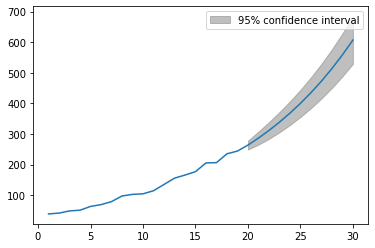

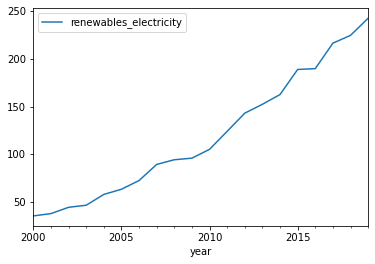

In [58]:
fig = ger_mod3.plot_predict( 1 , 30)
data_ger.plot('year', 'renewables_electricity', kind = 'line')